# Project: Building A Handwritten Digits Classifier

In this Guided Project, we'll:

1. explore why image classification is a hard task
2. observe the limitations of traditional machine learning models for image classification
3. train, test, and improve a few different deep neural networks for image classification


we'll build models that can classify handwritten digits. Before the year 2000, institutions like the United States Post Office used handwriting recognition software to read addresses, zip codes, and more. One of their approaches, which consists of pre-processing handwritten images then feeding to a neural network model is detailed in this paper.



### Why is image classification a hard task?

Within the field of machine learning and pattern recognition, image classification (especially for handwritten text) is towards the difficult end of the spectrum. There are a few reasons for this.

First, each image in a training set is high dimensional. Each pixel in an image is a feature and a separate column. This means that a 128 x 128 image has 16384 features.

Second, images are often downsampled to lower resolutions and transformed to grayscale (no color). This is a limitation of compute power unfortunately. The resolution of a 8 megapixel photo has 3264 by 2448 pixels, for a total of 7,990,272 features (or about 8 million). Images of this resolution are usually scaled down to between 128 and 512 pixels in either direction for significantly faster processing. This often results in a loss of detail that's available for training and pattern matching.

Third, the features in an image don't have an obvious linear or nonlinear relationship that can be learned with a model like linear or logistic regression. In grayscale, each pixel is just represented as a brightness value ranging from 0 to 256.

### Why is deep learning effective in image classification?

Deep learning is effective in image classification because of the models' ability to learn hierarchical representations. At a high level, an effective deep learning model learns intermediate representations at each layer in the model and uses them in the prediction process. Here's a diagram that visualizes what the weights represent at each layer of a convolutional neural network, a type of network that's often used in image classification and unfortunately out of scope for this course, which was trained to identify faces.

![Image Classification](https://s3.amazonaws.com/dq-content/244/nn_learns_hierarchy.png)


You'll notice in the first hidden layer the network learned to represent edges and specific features of faces. In the second hidden layer, the weights seemed to represent higher level facial features like eyes and noses. Finally, the weights in the last hidden layer resemble faces that could be matched against. Each successive layer uses weights from previous layers to try to learn more complex representations.

In this Guided Project, we'll explore the effectiveness of deep, feedforward neural networks at classifying images.

In [2]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

digits_data = load_digits()

In [3]:
digits_data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
labels = pd.Series(digits_data['target'])


In [5]:
data = pd.DataFrame(digits_data['data'])
data.head(1)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0


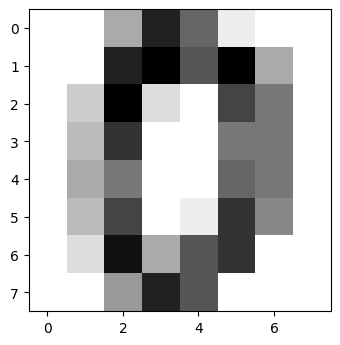

In [10]:
first_image = data.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)

plt.imshow(np_image, cmap='gray_r')

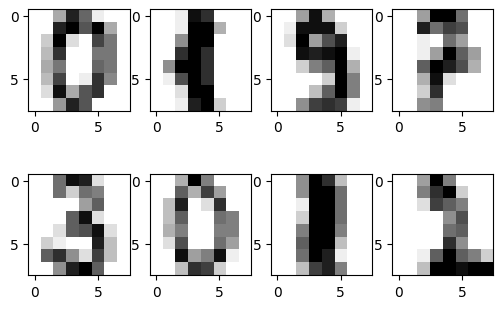

In [11]:
f, axarr = plt.subplots(2, 4)

# display the images corresponding to rows 0, 100, 200 and 300
axarr[0, 0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
axarr[0, 1].imshow(data.iloc[99].values.reshape(8,8), cmap='gray_r')
axarr[0, 2].imshow(data.iloc[199].values.reshape(8,8), cmap='gray_r')
axarr[0, 3].imshow(data.iloc[299].values.reshape(8,8), cmap='gray_r')

# display the images corresponding to rows 1000, 1100, 1200 and 1300

axarr[1, 0].imshow(data.iloc[999].values.reshape(8,8), cmap='gray_r')
axarr[1, 1].imshow(data.iloc[1099].values.reshape(8,8), cmap='gray_r')
axarr[1, 2].imshow(data.iloc[1199].values.reshape(8,8), cmap='gray_r')
axarr[1, 3].imshow(data.iloc[1299].values.reshape(8,8), cmap='gray_r')

## Modelling with KNN

The KNN model is a non-linear model which is more an algorithm than a model.

KNN compares observations in the test set to that of those in the training set.

The algorithm looks for similar observations in the training set with that of test set.

Linear and logistic regression models assume linearity between the features and the target.

The algorithm finds label with the most nearby observation and assigns that as prediction to the unseen observation

Train-test-split
Before we apply the KNN model on the data set, we

The data is split up into train and test sets
A pipeline set up for testing and training models
KNN classifier for training knn models named train()
test() function tests the model and cross_validate() performs 4 fold cross validation using train() and test()
Plot the classification accuracies with different k values

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

def train_knn(nneighbors, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors = nneighbors)
    knn.fit(train_features, train_labels)
    return knn

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df['predicted_label'] == train_test_df['correct_label'])/len(train_test_df)
    return overall_accuracy

def cross_validate(k):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_knn(k, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

knn_one_accuracies = cross_validate(1)
np.mean(knn_one_accuracies)

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



0.9677233358079684

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning:

Setting a random_state has no effect s

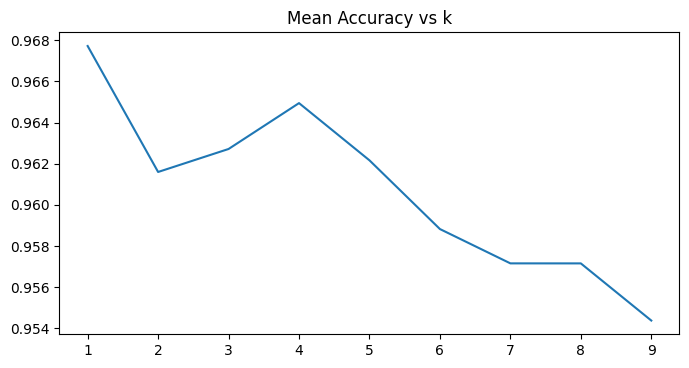

In [13]:
k_values = list(range(1, 10))
k_overall_accuracies = []

for k in k_values:
    k_accuracies = cross_validate(k)
    k_mean_accuracy = np.mean(k_accuracies)
    k_overall_accuracies.append(k_mean_accuracy)
    
plt.figure(figsize=(8, 4))
plt.title("Mean Accuracy vs k")
plt.plot(k_values, k_overall_accuracies)

### Demerits of KNN

The unseen observation makes many comparisons to seen observations resulting in high memory usage
There is no debug and explore possible as it lacks model representation


### Single Hidden Layer Neural Networks (SHL)
Train and test neural network with following single hidden layers using 4-fold cross validation

SHL of 8 neurons

SHL of 16 neurons

SHL of 32 neurons

SHL of 64 neurons

SHL of 128 neurons

SHL of 256 neurons

Model performances ranked on overall accuracies

Overfitting of models, ones peforming well on training sets but perform poorly on test sets

The performance and visualization of each model on the train and test sets.

Understanding the divergence of models as a result of the same.

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

# 50% train/test validation
def train_nn(neuron_arch, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes=neuron_arch)
    mlp.fit(train_features, train_labels)
    return mlp

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df['predicted_label'] == train_test_df['correct_label'])/len(train_test_df)
    return overall_accuracy
    
def cross_validate(neuron_arch):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        
        model = train_nn(neuron_arch, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

nn_one_neurons = [
    (8,),
    (16,),
    (32,),
    (64,),
    (128,),
    (256,)
]
nn_one_accuracies = []

for n in nn_one_neurons:
    nn_accuracies = cross_validate(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_one_accuracies.append(nn_mean_accuracy)
    
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons in Single Hidden Layer")

x = [i[0] for i in nn_one_neurons]
plt.plot(x, nn_one_accuracies)

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env

There is an improvement in the accuracy by adding more neurons to the single hidden layer from 86% to 94%
The accuracy calculated doesn't tell about the false or true positives or false or true negatives
The KNN model already achieved 96% accuracy. Single Hidden Layer using neural network doesn't have advantage over the former.
Double Hidden Layers Neural Networks (DHL)
Two hidden layers are used and continue to increase the number of neurons with each layer.

Using 4-fold cross validation to train model using two hidden layers.

Using 64 neurons in the first hidden layer and 64 neurons in the second hidden layer
Rank the performance of the models with overall accuracies

Overfitting of model, where we compute and visualize the performance for both train and test sets to check their divergence

In [ ]:
nn_two_neurons = [
    (64, 64),
    (128, 128),
    (256, 256)
]
nn_two_accuracies = []

for n in nn_two_neurons:
    nn_accuracies = cross_validate(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_two_accuracies.append(nn_mean_accuracy)
    
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs Neurons in two hidden layers")

x = [i[0] for i in nn_two_neurons]
plt.plot(x, nn_two_accuracies)

In [ ]:
nn_two_accuracies

The simple accuracy improves to 95% using two hidden layers.
The 4 fold cross validation gives assurance that the model
This is achieving extra 1% over the single accuracy over SHL network

In [ ]:
### Triple Hidden Layers Neural Networks (THL)

More hidden layers increase the overfitting. Increasing the k-fold cross validation to 6 and using 3 hidden layers and testing the same.

Model with 10, 10, 10 neurons as 1st, 2nd and 3rd hidden layers
Model with 64, 64, 64 neurons as 1st, 2nd and 3rd hidden layers
Model with 128, 128, 128 neurons as the 1st, 2nd and 3rd hidden layers

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

# 50% train/test validation
def train_nn(neuron_arch, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes=neuron_arch)
    mlp.fit(train_features, train_labels)
    return mlp

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df['predicted_label'] == train_test_df['correct_label'])/len(train_test_df)
    return overall_accuracy

def cross_validate_six(neuron_arch):
    fold_accuracies = []
    kf = KFold(n_splits=6, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        
        model = train_nn(neuron_arch, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

In [ ]:
nn_three_neurons = [
    (10, 10, 10),
    (64, 64, 64),
    (128, 128, 128)
]

nn_three_accuracies = []

for n in nn_three_neurons:
    nn_accuracies = cross_validate_six(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_three_accuracies.append(nn_mean_accuracy)
    
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs Neurons in three hidden layers")

x = [i[0] for i in nn_three_neurons]
plt.plot(x, nn_three_accuracies)

Therefore based on the research about deep neural networks for computer vision, more layers and more neurons tend to improve the netwoek's performance.
Even with 6 cross validation and 3 hidden layers, the accuracy is 95%


### Further Tuning and Steps Forward
This can be applied on Decision Tree and Random Forest models
The different models tried can be tried and a summary of effectiveness of models can be tried.
Different activation functions and their accuracies can be tried by visualizing weights in neural network models to dive deeper.